#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Task 1
Visualize the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("winequality-red.csv")
col_names = list( df.columns )
#df_features = df.drop( "quality", axis =1 )     

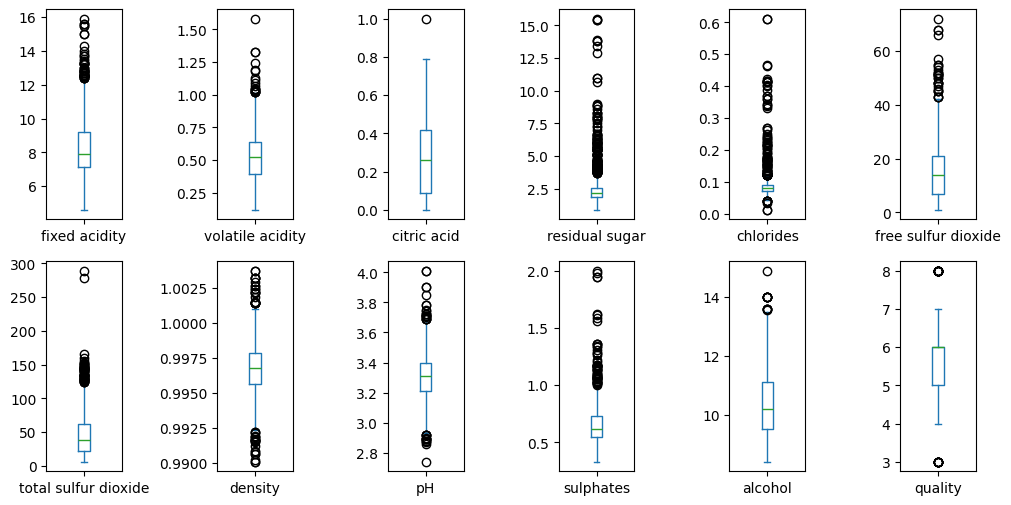

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# Drawing boxplots of features
boxplt_1 = df.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()
df

### Task 2
Scale and center the dataset. Re-visualize the variable boxplots.

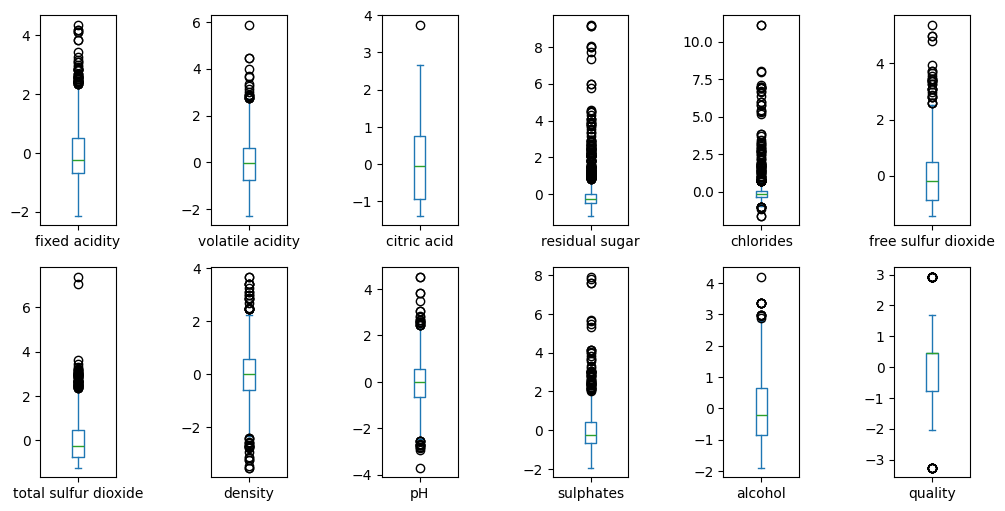

In [3]:
df_scaled = pd.DataFrame( StandardScaler().fit_transform(df), columns = col_names )

boxplot_scaled = df_scaled.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()

### Task 3
Apply PCA on the model. Treat all variables as independent (input) variables.

In [4]:
x = df_scaled.loc[ :, col_names ].values
y = df_scaled.loc[ :, col_names[-1]].values

pca_all = PCA().fit(x)
pca_all_data = pca_all.transform(x)

pca_cols = [f"PC{i}" for i in range(1, pca_all_data.shape[1] + 1)]
pca_all_df = pd.DataFrame( pca_all_data, columns = pca_cols)

pca_all_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,-1.157303,-1.386581,-0.044944,0.233885,0.976983,0.110528,-0.040320,0.294420,0.073112,-0.262937,0.048362
1,-1.004185,-2.071838,0.007759,0.466119,0.182454,-0.657775,1.376790,0.176714,-0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,-1.393434,-0.699286,0.345292,0.095210,-0.254823,0.720338,0.088687,-0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,0.213792,0.066381,-0.889182,-1.524742,0.132218,-0.200660,0.202816,0.506212,0.241135,-0.107616,0.319764
4,-1.779442,-1.157303,-1.386581,-0.044944,0.233885,0.976983,0.110528,-0.040320,0.294420,0.073112,-0.262937,0.048362
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.241991,-0.599594,0.795827,0.441059,-0.312981,-0.130820,-0.291926,-0.137412,0.421817,-1.016843,0.312767,-0.058920
1595,-2.122456,0.370101,2.138539,0.454564,0.104124,0.751228,0.436849,-0.181539,0.413852,-0.992136,0.465027,-0.240933
1596,-1.366265,0.517561,1.250696,0.514505,0.195916,0.552162,0.196039,0.121154,0.107569,-0.752854,0.235266,-0.402292
1597,-2.367147,-0.703545,0.899482,0.661956,0.021380,0.805753,-0.126669,-0.607400,0.378298,-0.723453,0.737253,0.036187


### Task 4
Visualize and comment the variation explained by the model with different no. PCs. Think of an explanation.

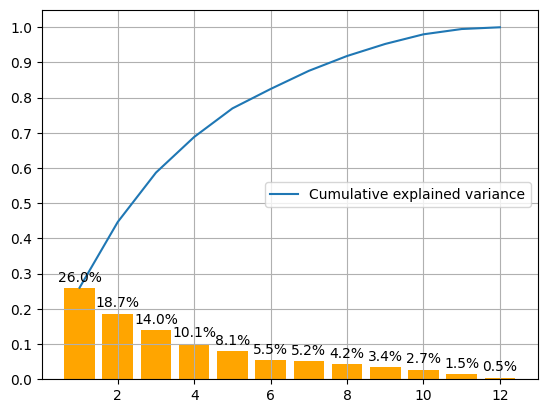

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [5]:
explained_variances = pca_all.explained_variance_ratio_
cum_explained_variances = np.cumsum( explained_variances )

pc_nums = np.arange( 1, len(cum_explained_variances )+1 ) 

plt.plot( pc_nums, cum_explained_variances, label = "Cumulative explained variance" )
var_bars = plt.bar( pc_nums, explained_variances, align = "center", linewidth=1.2, color = "orange")

for bar in var_bars:
    percentage = bar.get_height()
    textpos_x = bar.get_x() + bar.get_width() / 2
    textpos_y = percentage + 0.01
    text = str( round( percentage*100, 1 ) ) + "%"
    plt.text( textpos_x, textpos_y, text, ha = "center", va = "bottom")

#plt.title( "Explained variance of components" )
plt.yticks( np.arange( 0, 1.1, step = 0.1 ) )
plt.grid()
plt.legend( loc = 'center right' )

plt.show()

explained_variances


### Task 5
Compute the biplot of the first two principal components and explain covariances on it. Comment the biplot.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Biplot'}, xlabel='PC1 (26.01%)', ylabel='PC2 (18.68%)'>)

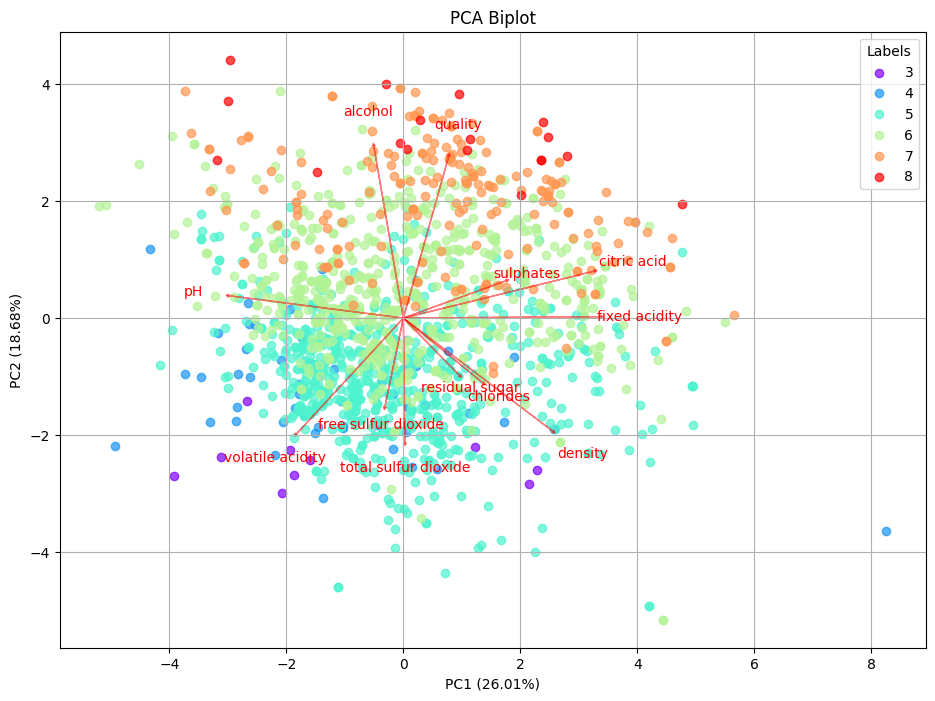

In [6]:
# Plot function politely given by Anthropic's Claude AI 
def plot_pca_biplot(projected_data, variable_loadings, explained_variance_ratio, components, labels=None, arrow_scale=1.5):
    # Check if the input components are valid
    if len(components) != 2:
        raise ValueError("components should be a list of two integers")
    
    # Extract the two selected principal components
    pc1, pc2 = components
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the projected data points
    if labels is not None:
        unique_labels = np.unique(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        for label, color in zip(unique_labels, colors):
            mask = labels == label
            ax.scatter(projected_data.iloc[mask, pc1], projected_data.iloc[mask, pc2], 
                       alpha=0.7, label=label, color=color)
        ax.legend(title="Labels")
    else:
        ax.scatter(projected_data.iloc[:, pc1], projected_data.iloc[:, pc2], alpha=0.7)
    
    # Calculate scaling factor for arrows
    data_range = max(
        projected_data.iloc[:, pc1].max() - projected_data.iloc[:, pc1].min(),
        projected_data.iloc[:, pc2].max() - projected_data.iloc[:, pc2].min()
    )
    
    divider = max( variable_loadings.iloc[:, pc1].abs().max(), variable_loadings.iloc[:, pc2].abs().max() )
    scaling = data_range / divider
    
    # Plot the variable loadings
    for i, (idx, row) in enumerate(variable_loadings.iterrows()):
        if arrow_scale == 0:
            x = row.iloc[pc1] 
            y = row.iloc[pc2] 
            ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05, head_length=0.05)
            ax.text(x * 1.2, y * 1.2, idx, color='r', ha='center', va='center')  
        else:
            x = row.iloc[pc1] * scaling * arrow_scale
            y = row.iloc[pc2] * scaling * arrow_scale
            ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05, head_length=0.05)
            ax.text(x * 1.2, y * 1.2, idx, color='r', ha='center', va='center')
    
    # Set labels and title
    ax.set_xlabel(f"PC{pc1+1} ({explained_variance_ratio[pc1]:.2%})")
    ax.set_ylabel(f"PC{pc2+1} ({explained_variance_ratio[pc2]:.2%})")
    ax.set_title("PCA Biplot")
    
    # Add a legend for variable loadings
    ax.plot([], [], 'r-', label='Variable loadings')
    if labels is None:
        ax.legend()
    
    # Equal aspect ratio
    ax.set_aspect('equal')
    
    # Add a grid
    ax.grid(True)
    
    return fig, ax


pca_2 = PCA( n_components=2 )
pca_2_data = pca_2.fit_transform(x)

loadings_2comp = pd.DataFrame( pca_2.components_.T * np.sqrt( pca_2.explained_variance_ ), index = col_names )
projected_data_2comp = pd.DataFrame( pca_2_data )
explained_variance_ratio_2comp = pca_2.explained_variance_ratio_

labels = df.loc[ :, col_names[-1]].values
plot_pca_biplot( projected_data_2comp, loadings_2comp, explained_variance_ratio_2comp, [0, 1], labels = labels, arrow_scale = 0.25)


### Task 6 
Your dataset has a quality indicator variable (potability/ wine quality). Using biplots, explain co-variations to the quality indicator. 


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'PCA Biplot'}, xlabel='PC2 (18.68%)', ylabel='PC3 (14.02%)'>)

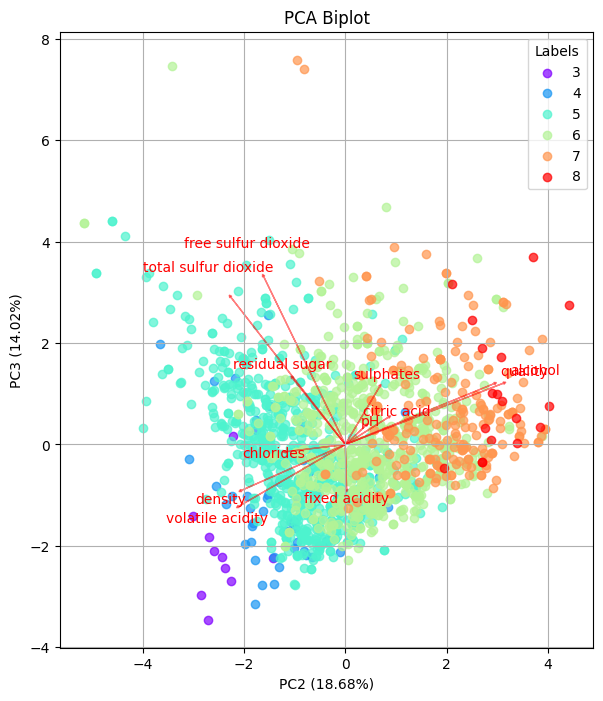

In [7]:
pca_3 = PCA( n_components=3 )
pca_3_data = pca_3.fit_transform(x)

loadings_3comp = pd.DataFrame( pca_3.components_.T * np.sqrt( pca_3.explained_variance_ ), index = col_names, columns = ["1", "2", "3"] )
projected_data_3comp = pd.DataFrame( pca_3_data, columns = ["1", "2", "3"] )
explained_variance_ratio_3comp = pca_3.explained_variance_ratio_


# Plot function politely given by Anthropic's Claude AI 
def plot_pca_biplot(projected_data, variable_loadings, explained_variance_ratio, components, labels=None, arrow_scale=1.5):
    # Check if the input components are valid
    if len(components) != 2:
        raise ValueError("components should be a list of two integers")
    
    # Extract the two selected principal components
    pc1, pc2 = components
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the projected data points
    if labels is not None:
        unique_labels = np.unique(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        for label, color in zip(unique_labels, colors):
            mask = labels == label
            ax.scatter(projected_data.iloc[mask, pc1], projected_data.iloc[mask, pc2], 
                       alpha=0.7, label=label, color=color)
        ax.legend(title="Labels")
    else:
        ax.scatter(projected_data.iloc[:, pc1], projected_data.iloc[:, pc2], alpha=0.7)
    
    # Calculate scaling factor for arrows
    data_range = max(
        projected_data.iloc[:, pc1].max() - projected_data.iloc[:, pc1].min(),
        projected_data.iloc[:, pc2].max() - projected_data.iloc[:, pc2].min()
    )
    
    divider = max( variable_loadings.iloc[:, pc1].abs().max(), variable_loadings.iloc[:, pc2].abs().max() )
    scaling = data_range / divider
    
    # Plot the variable loadings
    for i, (idx, row) in enumerate(variable_loadings.iterrows()):
        x = row.iloc[pc1] * scaling * arrow_scale
        y = row.iloc[pc2] * scaling * arrow_scale
        ax.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05, head_length=0.05)
        ax.text(x * 1.2, y * 1.2, idx, color='r', ha='center', va='center')
    
    # Set labels and title
    ax.set_xlabel(f"PC{pc1+1} ({explained_variance_ratio[pc1]:.2%})")
    ax.set_ylabel(f"PC{pc2+1} ({explained_variance_ratio[pc2]:.2%})")
    ax.set_title("PCA Biplot")
    
    # Add a legend for variable loadings
    ax.plot([], [], 'r-', label='Variable loadings')
    if labels is None:
        ax.legend()
    
    # Equal aspect ratio
    ax.set_aspect('equal')
    
    # Add a grid
    ax.grid(True)
    
    return fig, ax

labels = df.loc[ :, col_names[-1]].values
plot_pca_biplot( projected_data_3comp, loadings_3comp, explained_variance_ratio_3comp, [1, 2], labels = labels, arrow_scale = 0.3)


### Task 7
Using loading bar plots, explain the importance of variables in the first principal components, and their variational profiles.

(<Figure size 2400x1000 with 3 Axes>,
 array([<Axes: title={'center': 'PC1 Loading Scores\n(Explained Variance: 26.01%)'}, ylabel='Loading Score'>,
        <Axes: title={'center': 'PC2 Loading Scores\n(Explained Variance: 18.68%)'}, ylabel='Loading Score'>,
        <Axes: title={'center': 'PC3 Loading Scores\n(Explained Variance: 14.02%)'}, ylabel='Loading Score'>],
       dtype=object))

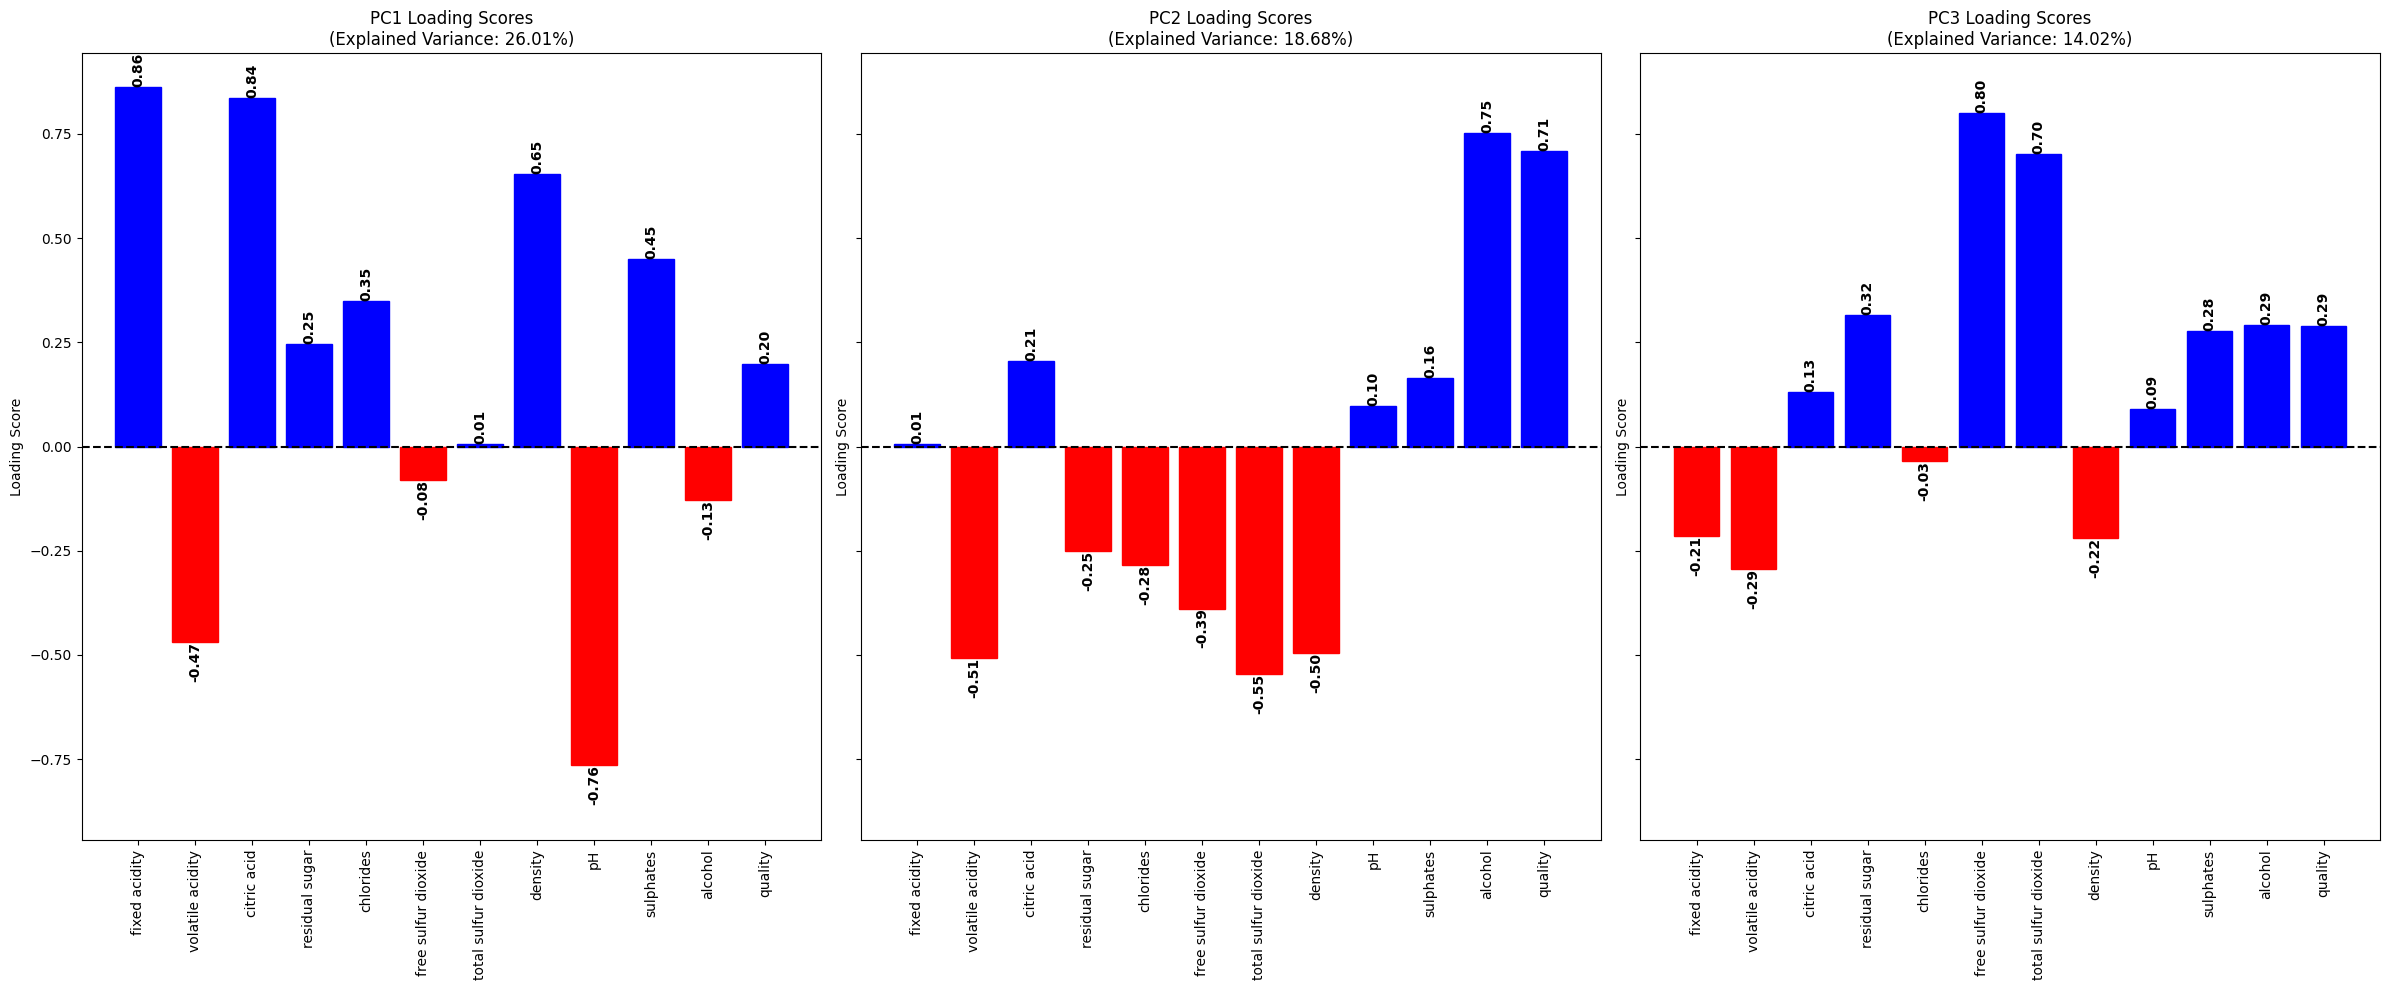

In [9]:
# Once again, thank you Claude AI
def plot_loading_scores(variable_loadings, explained_variance_ratio, feature_names, components):
    # Check if inputs are valid
    if len(feature_names) != variable_loadings.shape[0]:
        raise ValueError("Number of feature names must match the number of rows in variable_loadings")
    
    if max(components) >= variable_loadings.shape[1]:
        raise ValueError("Requested component exceeds the number of available components")
    
    # Set up the plot
    n_components = len(components)
    fig, axes = plt.subplots(1, n_components, figsize=(8 * n_components, 10), sharey=True)
    if n_components == 1:
        axes = [axes]
    
    # Plot for each requested component
    for ax, pc in zip(axes, components):
        # Get loadings for the current component
        loadings = variable_loadings.iloc[:, pc]
        
        # Create vertical bar plot
        bars = ax.bar(range(len(feature_names)), loadings, align='center')
        
        # Color bars based on their values
        for bar in bars:
            if bar.get_height() < 0:
                bar.set_color('r')
            else:
                bar.set_color('b')
        
        # Customize the plot
        ax.set_xticks(range(len(feature_names)))
        ax.set_xticklabels(feature_names, rotation=90, ha='center')
        ax.set_ylabel('Loading Score')
        ax.set_title(f'PC{pc+1} Loading Scores\n(Explained Variance: {explained_variance_ratio[pc]:.2%})')
        ax.axhline(y=0, color='k', linestyle='--')
        
        # Add value labels on the bars
        for i, v in enumerate(loadings):
            ax.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v >= 0 else 'top', 
                    fontweight='bold', rotation=90)
        
        # Set y-axis limits to be symmetric around 0
        y_max = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))
        ax.set_ylim(-y_max, y_max)
    
    plt.tight_layout()
    return fig, axes

plot_loading_scores( loadings_3comp, explained_variance_ratio_3comp, col_names, [0, 1, 2] )